# Soal Responsi BDDM Tipe-3

## Rule:


1.   Tulis Identitas Anda dalam file IPYNB
2.   Rename File IPYNB anda dengan format XXXX_tipeY, dimana xxxx adalah 4 digit nim terakhir dan Y adalah nomor tipe soal
3.   Kerjakan Langsung di file IPYNB ini. 
4. Dataset:https://drive.google.com/file/d/1ZlY1kjD8fCcNwvPGW_emPpGfb9_WGLoo/view?usp=share_link


5. Keterangan Data set:

Attribute information:
1.  Age: 20-65
2.  Sex: Male/Female
3.  Polyuria: Yes/No
4.  Polydipsia: Yes/No
5.  sudden weight loss: Yes/No
6.  weakness: Yes/No
7.  Polyphagia: Yes/No
8.  Genital thrush: Yes/No
9.  visual blurring: Yes/No
10.  Itching: Yes/No
11.  Irritability: Yes/No
12.  delayed healing: Yes/No
13.  partial paresis: Yes/No
14.  muscle stiffness: Yes/No
15.  Alopecia: Yes/No
16.  Obesity: Yes/No
17.  Class: Positive/Negative

# Identitas


*   **Nim: 20.11.3694**
*   **Nama: Fathurrahman Nur Aziz**
*   **Kelas: 20IF07**




#Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import *

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

#LOAD DATASET

In [ ]:
url = 'https://drive.google.com/file/d/1ZlY1kjD8fCcNwvPGW_emPpGfb9_WGLoo/view?usp=share_link' #link google drive dataset
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

## 1. Tampilkan Data Menggunakan Dataframe

In [ ]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


## 2. Lakukan Data PReprocessing: handling missing value & data transformation

In [ ]:
#cek total baris dan kolom
df.shape

(520, 17)

In [ ]:
#cek apakah ada null
df.isna().any()

Age                   False
Gender                False
Polyuria              False
Polydipsia            False
sudden weight loss    False
weakness              False
Polyphagia            False
Genital thrush        False
visual blurring       False
Itching               False
Irritability          False
delayed healing       False
partial paresis       False
muscle stiffness      False
Alopecia              False
Obesity               False
class                 False
dtype: bool

***tidak ada missing value, sehingga tidak perlu melakukan handling missing value***

###DATA TRANSFORMATION - ENCODING - MERUBAH OBJECT MENJADI INTEGER

In [ ]:
#show unique values for each column
for columnName, columnData in df.iteritems():
  print(f'Column name : {columnName}')
  print(f'Column unique : {set(columnData.values)} \n')

Column name : Age
Column unique : {16, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 79, 85, 90} 

Column name : Gender
Column unique : {'Female', 'Male'} 

Column name : Polyuria
Column unique : {'No', 'Yes'} 

Column name : Polydipsia
Column unique : {'No', 'Yes'} 

Column name : sudden weight loss
Column unique : {'No', 'Yes'} 

Column name : weakness
Column unique : {'No', 'Yes'} 

Column name : Polyphagia
Column unique : {'No', 'Yes'} 

Column name : Genital thrush
Column unique : {'No', 'Yes'} 

Column name : visual blurring
Column unique : {'No', 'Yes'} 

Column name : Itching
Column unique : {'No', 'Yes'} 

Column name : Irritability
Column unique : {'No', 'Yes'} 

Column name : delayed healing
Column unique : {'No', 'Yes'} 

Column name : partial paresis
Column unique : {'No', 'Yes'} 

Column name : muscle stiffness
Column unique : {'No'

In [ ]:
#encoding gender
num_gender = {
    'Female':0,
    'Male':1
}

#encoding yes no
num_yes_no={
    'No':0,
    'Yes':1
}

#encoding class
num_class={
    'Negative':0,
    'Positive':1
}

df_encoded = df.copy()

#mapping
df_encoded['Gender']=df_encoded['Gender'].map(num_gender)
df_encoded['Polyuria']=df_encoded['Polyuria'].map(num_yes_no)
df_encoded['Polydipsia']=df_encoded['Polydipsia'].map(num_yes_no)
df_encoded['sudden weight loss']=df_encoded['sudden weight loss'].map(num_yes_no)
df_encoded['weakness']=df_encoded['weakness'].map(num_yes_no)
df_encoded['Polyphagia']=df_encoded['Polyphagia'].map(num_yes_no)
df_encoded['Genital thrush']=df_encoded['Genital thrush'].map(num_yes_no)
df_encoded['visual blurring']=df_encoded['visual blurring'].map(num_yes_no)
df_encoded['Itching']=df_encoded['Itching'].map(num_yes_no)
df_encoded['Irritability']=df_encoded['Irritability'].map(num_yes_no)
df_encoded['delayed healing']=df_encoded['delayed healing'].map(num_yes_no)
df_encoded['partial paresis']=df_encoded['partial paresis'].map(num_yes_no)
df_encoded['muscle stiffness']=df_encoded['muscle stiffness'].map(num_yes_no)
df_encoded['Alopecia']=df_encoded['Alopecia'].map(num_yes_no)
df_encoded['Obesity']=df_encoded['Obesity'].map(num_yes_no)
df_encoded['class']=df_encoded['class'].map(num_class)

In [ ]:
#cek data setelah di encoding
df_encoded.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


## 3. Lakukan Seleksi Fitur: menggunakan metode: Perason Correlation Selection, gunakan 6 fitur teratas

In [ ]:
#mencari korelasi PEARSON
cor=df_encoded.corr(method='pearson')
cor

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
Gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
Polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


In [ ]:
#cari 6 fitur teratas
cor_target = abs(cor['class'])

relevant_features=cor_target[cor_target>0.3]
relevant_features

Gender                0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
Polyphagia            0.342504
partial paresis       0.432288
class                 1.000000
Name: class, dtype: float64

***6 fitur teratas adalah Gender, Polyuria, Polydipsia, sudden weight loss,  Polyphagia, partial paresis***

In [ ]:
#select feature dan target
df_feature_select = df_encoded[['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss','Polyphagia','partial paresis','class']]
df_feature_select

,Gender,Polyuria,Polydipsia,sudden weight loss,Polyphagia,partial paresis,class
0,1,0,1,0,0,0,1
1,1,0,0,0,0,1,1
2,1,1,0,0,1,0,1
3,1,0,0,1,1,0,1
4,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
515,0,1,1,1,1,1,1
516,0,1,1,1,1,1,1
517,0,1,1,1,1,1,1
518,0,0,0,0,0,0,0


##4. Buatlah Model klasifikasi untuk memprediksi Kelas positif diabetes, menggunakan Algoritma Naive Bayes.

In [ ]:
#mengubah dataframe yang sudah diseleksi menjadi fitur dan target

#X -> independent var (fitur)
X = df_feature_select.iloc[:,[0,1,2,3,4,5]].values

#y -> dependent var (target)
y = df_feature_select.iloc[:,-1].values

In [ ]:
#menampilkan 10 nilai awal X dan y
print(f'X: \n {X[:10]}')
print(f'y: \n {y[:10]}')

X: 
 [[1 0 1 0 0 0]
 [1 0 0 0 0 1]
 [1 1 0 0 1 0]
 [1 0 0 1 1 0]
 [1 1 1 1 1 1]
 [1 1 1 0 1 0]
 [1 1 1 0 1 1]
 [1 1 1 1 0 1]
 [1 1 1 0 1 1]
 [1 0 1 1 1 0]]
y: 
 [1 1 1 1 1 1 1 1 1 1]


In [ ]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#print bentuk dari hasil data split
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (416, 6)
X_test shape:  (104, 6)
y_train shape:  (416,)
y_test shape:  (104,)


In [ ]:
#membuat model klasifikasi dengan Gaussian Naive Bayes
classifierNB = GaussianNB()
classifierNB.fit(X_train,y_train)

GaussianNB()

In [ ]:
#melakukan prediksi

NB_pred = classifierNB.predict(X_test)

In [ ]:
#menampilkan hasil prediksi 15 kolom pertama
print('index \t positive_diabetes');
for i,y in enumerate(NB_pred[:15]):
  print(f'{i} \t {y}')

index 	 positive_diabetes
0 	 1
1 	 1
2 	 1
3 	 0
4 	 0
5 	 1
6 	 1
7 	 1
8 	 1
9 	 1
10 	 1
11 	 0
12 	 1
13 	 1
14 	 1


In [ ]:
#melihat probabilitas dari 15 data awal X test

classifierNB.predict_proba(X_test[:15])

array([[4.21604078e-05, 9.99957840e-01],
       [7.26231522e-05, 9.99927377e-01],
       [9.19839447e-12, 1.00000000e+00],
       [9.99231417e-01, 7.68582684e-04],
       [9.74767174e-01, 2.52328263e-02],
       [1.31988695e-08, 9.99999987e-01],
       [1.19348977e-07, 9.99999881e-01],
       [1.60859255e-02, 9.83914074e-01],
       [2.89265437e-01, 7.10734563e-01],
       [9.19839447e-12, 1.00000000e+00],
       [9.40162594e-03, 9.90598374e-01],
       [9.99231417e-01, 7.68582684e-04],
       [1.19489028e-02, 9.88051097e-01],
       [4.24037465e-05, 9.99957596e-01],
       [2.97110289e-06, 9.99997029e-01]])

## 5. Lakukan Evaluasi Terhadap Model Yang anda Bangun, Jelaskan Analisa anda terhadap hasil evaluasi tersebut

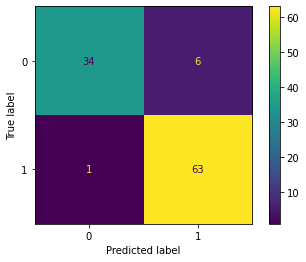

In [ ]:
#menampilkan confussion matrix antara Naive Bayes
plot_confusion_matrix(classifierNB,X_test,y_test)
plt.show()

In [ ]:
#menampilkan classification report untuk Naive Bayes Classification
print('-------------------------------------------------------')
print('Classification Report for Naive Bayes Classification')
print('-------------------------------------------------------')
print(classification_report(y_test,NB_pred,zero_division=0))

-------------------------------------------------------
Classification Report for Naive Bayes Classification
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.85      0.91        40
           1       0.91      0.98      0.95        64

    accuracy                           0.93       104
   macro avg       0.94      0.92      0.93       104
weighted avg       0.94      0.93      0.93       104



###ANALISIS

Berdasarkan Confusion Matrix, maka klasifikasi tersebut menghasilkan:

* True Negative : 34
* True Positive : 63
* False Positive : 6
* False Negative : 1

**Maka dapat dikatakan bahwa klasifikasi tersebut dapat benar-benar melakukan prediksi positif ataupun negatif karena nilai false nya sangat sedikit**

Berdasarkan Classification Report, maka klasifikasi tersebut menghasilkan: 
* Akurasi : 93%
* Nilai Presisi Negatif : 97%
* Nilai Presisi Positif : 91%
* Nilai Recall Negatif : 85%
* Nilai Recall Positif : 98%

Artinya: 
* **Berdasakan nilai presisi, maka Algoritma Naive Bayes telah bagus dalam melakukan klasifikasi dataset tersebut karena banyak True Positif dengan prediksi yang dilakukan (97% dan 91%)**
* **Berdasarkan nilai Recall, maka Algoritma Naive Bayes telah bagus dalam melakukan klasifikasi dataset tersebut karena banyak True Positif yang sesuai dengan class sebenarnya (85% dan 98%)**
* **Nilai akurasi yang cukup tinggi (93%) mengindikasikan bahwa klasifikasi dataset tersebut dengan Naive Bayes telah menghasilkan prediksi class yang baik**